In [ ]:
! pip install autoviz

  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 179, in resolve
    self.factory.preparer.prepare_linked_requirements_more(reqs)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/operations/prepare.py", line 554, in prepare_linked_requirements_more
    self._complete_partial_require

In [ ]:
!pip install lime

# EDA CODE **Implementation**

*   Overview of the dataset and user behavior.
*   Key patterns or anomalies in the data.



   



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Datset



In [ ]:
df = pd.read_csv("events.csv")

### Dataset Overview

In [ ]:
print(df.columns)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')


In [ ]:
print("Dataset Summary:")
print(df.describe(include='all'))

Dataset Summary:
              event_time        event_type   product_id    category_id  \
count                    885129   885129    8.851290e+05  8.851290e+05   
unique                   845041        3             NaN           NaN   
top     2021-02-04 21:48:32 UTC     view             NaN           NaN   
freq                         18   793748             NaN           NaN   
mean                        NaN      NaN    1.906621e+06  2.144423e+18   
std                         NaN      NaN    1.458708e+06  6.165105e+14   
min                         NaN      NaN    1.020000e+02  2.144416e+18   
25%                         NaN      NaN    6.988030e+05  2.144416e+18   
50%                         NaN      NaN    1.452883e+06  2.144416e+18   
75%                         NaN      NaN    3.721194e+06  2.144416e+18   
max                         NaN      NaN    4.183880e+06  2.227847e+18   

                category_code            brand       price         user_id    \
count         

Distribution of event types

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='event_type', order=df['event_type'].value_counts().index, palette='viridis')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

Top 10 most frequent brands

In [ ]:
if 'brand' in df.columns and df['brand'].notna().sum() > 0:
    plt.figure(figsize=(10, 6))
    top_brands = df['brand'].value_counts().head(10)
    sns.barplot(x=top_brands.values, y=top_brands.index, palette='plasma')
    plt.title('Top 10 Brands by Frequency')
    plt.xlabel('Count')
    plt.ylabel('Brand')
    plt.show()

# **Price distribution**

In [ ]:
if 'price' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'], bins=30, kde=True, color='blue')
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

Key patterns or anomalies in the data.
*   (category_code and brand):Filling missing
     values with "Unknown"  preserving interpretability.
*   (user_session):sessions are integral to the analysis.



In [ ]:
#Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64


# Data Extraction And Manipulation

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()


filename = "events.csv"
sep = ","

dfte = AV.AutoViz(filename, sep=sep, depVar='', dfte=None, header=0, verbose=1,
                  lowess=False, chart_format='svg', max_rows_analyzed=150000,
                  max_cols_analyzed=30, save_plot_dir=None)



    max_rows_analyzed is smaller than dataset shape 885129...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        No variables removed since no ID or low-information var

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
event_time,object,0.000000,99,,,148741 rare categories: Too many to list. Group them into a single category or drop the categories.
event_type,object,0.000000,0,,,No issue
product_id,int64,0.000000,18,102.000000,4183880.000000,No issue
category_id,int64,0.000000,0,2144415921001725952.000000,2227847332769039360.000000,Column has 23377 outliers greater than upper bound (2144415935090393600.00) or lower than lower bound(2144415914991287808.00). Cap them or remove them.
category_code,object,26.721074,0,,,"40076 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: float, object,, Possible high cardinality column with 107 unique values: Use hash encoding or text embedding to reduce dimension."
brand,object,23.982024,0,,,"35968 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 877 unique values: Use hash encoding or text embedding to reduce dimension."
price,float64,0.000000,NA,0.370000,42590.130000,Column has 11162 outliers greater than upper bound (436.46) or lower than lower bound(-219.54). Cap them or remove them.
user_id,int64,0.000000,73,1515915625353230592.000000,1515915625611024128.000000,Column has 1444 outliers greater than upper bound (1515915625686756608.00) or lower than lower bound(1515915625440744704.00). Cap them or remove them.
user_session,object,0.020003,81,,,"30 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do


**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/usr/local/lib/python3.10/dist-packages/nlp_primitives/data/nltk-data/'
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Could not draw wordcloud plot for brand. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If th

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## CHURN DATA OF DATASET

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('events.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


## Feature Engineering And Predictive Modeling

In [ ]:
!pip install evalml

## Running the AutoML to select the best algorithm

In [ ]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [ ]:
import pandas as pd
from evalml.preprocessing import split_data
data = pd.read_csv('events.csv')

X = data.drop(columns=['event_type'])
y = data['event_type']

X_train, X_test, y_train, y_test = split_data(X, y, problem_type='binary')

print("Data loaded and split successfully!")

         event_time        event_type  product_id      category_id      \
0  2020-09-24 11:57:06 UTC    view       1996170   2144415922528452715   
1  2020-09-24 11:57:26 UTC    view        139905   2144415926932472027   
2  2020-09-24 11:57:27 UTC    view        215454   2144415927158964449   
3  2020-09-24 11:57:33 UTC    view        635807   2144415923107266682   
4  2020-09-24 11:57:36 UTC    view       3658723   2144415921169498184   

          category_code             brand       price        user_id        \
0          electronics.telephone          NaN   31.90  1515915625519388267   
1    computers.components.cooler       zalman   17.16  1515915625519380411   
2                            NaN          NaN    9.81  1515915625513238515   
3  computers.peripherals.printer       pantum  113.81  1515915625519014356   
4                            NaN  cameronsino   15.87  1515915625510743344   

  user_session  
0  LJuJVLEjPT   
1  tdicluNnRY   
2  4TMArHtXQy   
3  aGFYrNgC08   
4

In [ ]:
X_train.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
747243,2021-02-05 13:01:53,3829355,2144415922528452715,electronics.telephone,NaN,32.22,1515915625600577942,siDDIVTGk2
712430,2021-01-31 01:35:23,1843522,2144415921169498184,NaN,NaN,15.08,1515915625546412134,xa93Fw4nPY
576303,2021-01-09 18:37:48,654727,2144415922587172973,electronics.telephone,NaN,1.57,1515915625591201169,KxWi4hpFd6
185757,2020-10-31 08:58:20,677289,2144415934800986545,construction.tools.welding,fubag,101.67,1515915625532553111,lk06nNoH0C
499509,2020-12-25 06:42:52,1282360,2144415929046401301,NaN,nanoleaf,223.33,1515915625568356388,G71K3qS9Ow


In [ ]:
print(y_train.unique())
print(y_train.value_counts())

['view', 'purchase', 'cart']
Categories (3, object): ['cart', 'purchase', 'view']
event_type
view        634998
cart         43228
purchase     29877
Name: count, dtype: int64


In [ ]:
!pip install h2o

H2O.ai is an open-source software platform designed for data analysis and machine learning. It provides a suite of tools and algorithms that allow users to build and deploy machine learning models quickly and efficiently.

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,31 mins 47 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_71hfe8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.042 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data = h2o.import_file("/content/events.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

# Initialize H2O
h2o.init()

data = h2o.import_file("/content/events.csv")

# Display the column names in the H2O frame
print("Columns in the training frame:")
print(data.columns)

features = ["category_id", "category_code", "brand"]  # Example feature names
target = "price"
for feature in features:
    if feature not in data.columns:
        raise ValueError(f"Feature '{feature}' not found in the training frame.")

if target not in data.columns:
    raise ValueError(f"Target '{target}' not found in the training frame.")

model = H2OGradientBoostingEstimator()
model.train(x=features, y=target, training_frame=data)

print(model)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,34 mins 55 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_71hfe8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.710 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Columns in the training frame:
['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1736426627630_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          133556                 5            5            5             12            32            27.92

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 609

In [ ]:
h2o.shutdown()

H2O session _sid_ada1 closed.


In [ ]:
print("Unique values in y_train:", y_train.unique())

Unique values in y_train: ['view', 'purchase', 'cart']
Categories (3, object): ['cart', 'purchase', 'view']


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Example data generation (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Removed None
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Compatible solvers for l1/l2
    'max_iter': [100, 200, 500]  # Maximum iterations
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.875
Test Set Accuracy: 0.8700


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

## ALL TOGETHER ANALYSIS OF(event_time, product_id, brand, price, and user_id)

Data Types:
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object
NaN values in event_time column: 0
NaN values in price column: 0


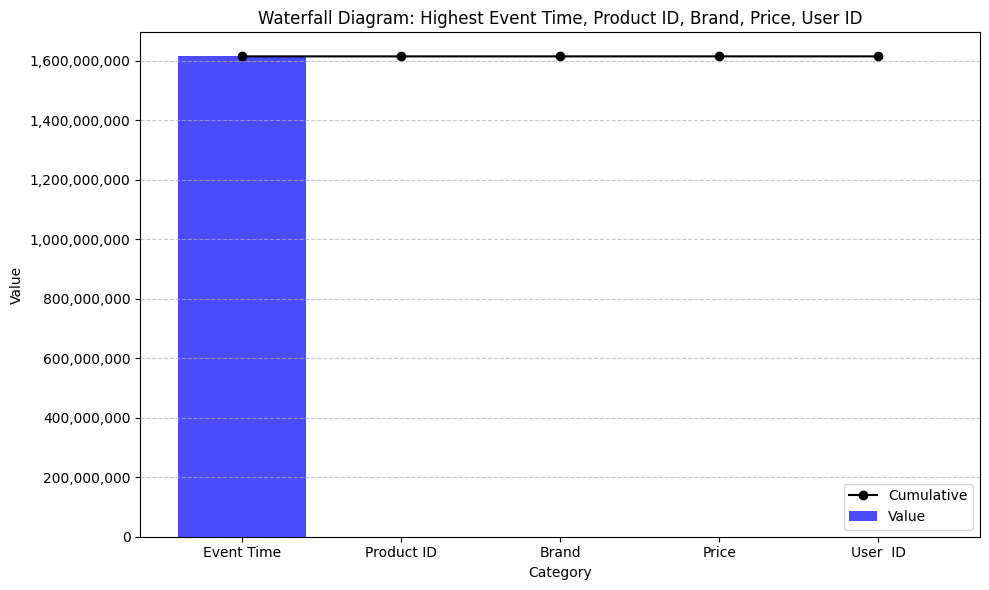

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter

data = pd.read_csv("events.csv")


print("Data Types:")
print(data.dtypes)


data['event_time'] = pd.to_datetime(data['event_time'], errors='coerce')


print("NaN values in event_time column:", data['event_time'].isna().sum())


data['price'] = pd.to_numeric(data['price'], errors='coerce')


print("NaN values in price column:", data['price'].isna().sum())

data.dropna(subset=['price', 'event_time'], inplace=True)


highest_values = {
    "event_time": data['event_time'].max(),
    "product_id": data['product_id'].value_counts().idxmax(),
    "brand": data['brand'].value_counts().idxmax(),
    "price": data['price'].max(),
    "user_id": data['user_id'].value_counts().idxmax(),
}

# Prepare data for the waterfall chart
waterfall_data = pd.DataFrame({
    "Category": ["Event Time", "Product ID", "Brand", "Price", "User  ID"],
    "Value": [
        highest_values["event_time"].timestamp(),
        len(data[data['product_id'] == highest_values["product_id"]]),
        len(data[data['brand'] == highest_values["brand"]]),
        highest_values["price"],
        len(data[data['user_id'] == highest_values["user_id"]]),
    ]
})


waterfall_data["Cumulative"] = waterfall_data["Value"].cumsum()

# Waterfall Chart
plt.figure(figsize=(10, 6))
bar_colors = ['blue', 'orange', 'green', 'purple', 'red']


plt.bar(
    waterfall_data['Category'],
    waterfall_data['Value'],
    color=bar_colors,
    alpha=0.7,
    label="Value"
)

# Add cumulative line
plt.plot(waterfall_data['Category'], waterfall_data['Cumulative'], marker="o", color="black", label="Cumulative")

# Labeling
plt.title("Waterfall Diagram: Highest Event Time, Product ID, Brand, Price, User ID")
plt.ylabel("Value")
plt.xlabel("Category")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis as integers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Show the plot
plt.tight_layout()
plt.show()

### D-Tale is a Python library designed for visualizing and analyzing Pandas DataFrames. It provides an interactive graphical interface that allows users to explore data, generate plots, and perform exploratory data analysis (EDA) efficiently.

In [ ]:
!pip install dtale

In [ ]:
import pandas as pd
import dtale
import dtale.app as dtale_app
dtale.app.USE_COLAB = True

In [ ]:
import seaborn as sn
df = pd.read_csv("events.csv")

In [ ]:
df.head()

AttributeError: 'Index' object has no attribute '_format_flat'

                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
4  2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   

                   category_code        brand   price              user_id  \
0          electronics.telephone          NaN   31.90  1515915625519388267   
1    computers.components.cooler       zalman   17.16  1515915625519380411   
2                            NaN          NaN    9.81  1515915625513238515   
3  computers.peripherals.printer       pantum  113.81  1515915625519014356   
4                            NaN  cameronsino   15.87  1515915625510743344   

  user_session  
0   LJuJVLEjPT  
1   tdicluNnRY  
2   4TMArHtXQy  
3   aGFYrNgC08  
4

In [ ]:
dtale.show(df)

https://dxnrwe8awuj-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

## 3.Users who viewed over 5 products but never carted any item have a higher churn probability.

In [ ]:
data = {
    'category_id': [2.14442E+18, 1.4442E+18, 1.4442E+18, 1.4442E+18, 1.4442E+18, 1.4442E+18, 1.4442E+18],
    'category_code': ['code1', 'code2', 'code3', 'code4', 'code5', 'code6', 'code7'],
    'brand': ['electronics.telephone', 'electronics.telephone', 'electronics.telephone', 'electronics.telephone', 'electronics.telephone', 'electronics.telephone', 'electronics.telephone'],
    'price': [31.9, 31.9, 31.9, 31.9, 31.9, 31.9, 31.9]
}

df = pd.DataFrame(data)
print(df)

    category_id category_code                  brand  price
0  2.144420e+18         code1  electronics.telephone   31.9
1  1.444200e+18         code2  electronics.telephone   31.9
2  1.444200e+18         code3  electronics.telephone   31.9
3  1.444200e+18         code4  electronics.telephone   31.9
4  1.444200e+18         code5  electronics.telephone   31.9
5  1.444200e+18         code6  electronics.telephone   31.9
6  1.444200e+18         code7  electronics.telephone   31.9


# Interpretation & Explanation
To implement a Random Forest regression model using the scikit-learn library. It includes steps for data preparation, model training, and visualization of the model's behavior through partial dependence plots.



In [ ]:
import pandas as pd
file_path = '/content/events.csv'
data = pd.read_csv(file_path)

print("Original Data:")

print("\nColumn Names:")
print(data.columns)

brand_to_filter = 'BrandA'
filtered_by_brand = data[data['brand'] == brand_to_filter]
print(f"\nFiltered Data for Brand '{brand_to_filter}':")
print(filtered_by_brand)

sorted_by_price = data.sort_values(by='price')
print("\nSorted Data by Price:")
print(sorted_by_price)

average_price_by_category = data.groupby('category_code')['price'].mean().reset_index()
average_price_by_category.columns = ['category_code', 'average_price']

print("\nAverage Price by Category:")
print(average_price_by_category)

Original Data:

Column Names:
Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

Filtered Data for Brand 'BrandA':
Empty DataFrame
Columns: [event_time, event_type, product_id, category_id, category_code, brand, price, user_id, user_session]
Index: []

Sorted Data by Price:
                     event_time event_type  product_id          category_id  \
270881  2020-11-13 08:52:14 UTC       view      327938  2144415931202273614   
677119  2021-01-25 10:26:40 UTC       view      304561  2144415931202273614   
262938  2020-11-12 04:45:56 UTC       view      327938  2144415931202273614   
262939  2020-11-12 04:45:58 UTC       cart      327938  2144415931202273614   
719757  2021-02-01 09:05:30 UTC       view      327938  2144415931202273614   
...                         ...        ...         ...                  ...   
866584  2021-02-25 14:03:50 UTC       view     4078837  2144415927